<a href="https://colab.research.google.com/github/Tomoyuki0223/machine_learning_question/blob/main/kadai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 4.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=f6acc2bbac7103c19870bc442cb1bd6a1a263e08d098d916eb03e753cb83fd06
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
D = np.array([[1, 3], [3, 6], [6, 5], [8, 7]])
x_T = D[:,0]
y_T = D[:,1]

In [4]:
x_T = np.reshape(x_T, (1, 4))
y_T = np.reshape(y_T, (1, 4))
x =  x_T.T
y =  y_T.T

In [5]:
def plot_graph(X, Y, x, y):
    fig, ax = plt.subplots(dpi=100)
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.grid()
    ax.scatter(X, Y, marker='.')
    ax.plot(x, y, 'r')
    fig.show()

# (1)

In [6]:
X = np.array([[1, D[0,0]], [1, D[1,0]], [1, D[2,0]], [1, D[3,0]]])

In [7]:
X_T = X.T

In [8]:
X_T_X = np.dot(X_T, X)
X_T_X_inv = np.linalg.inv(X_T_X)

In [9]:
omega = X_T_X_inv @ X_T @ y
omega

array([[3.31034483],
       [0.43103448]])

# (2)

In [10]:
X2 = np.array([[1, D[0,0], D[0,0]**2], [1, D[1,0], D[1,0]**2], [1, D[2,0], D[2,0]**2], [1, D[3,0], D[3,0]**2]])

In [11]:
X2_T = X2.T

In [12]:
X2_T_X2 = np.dot(X2_T, X2)
X2_T_X2_inv = np.linalg.inv(X2_T_X2)

In [13]:
omega2 = X2_T_X2_inv @ X2_T @ y
omega2

array([[ 2.66034483],
       [ 0.88103448],
       [-0.05      ]])

# (3)

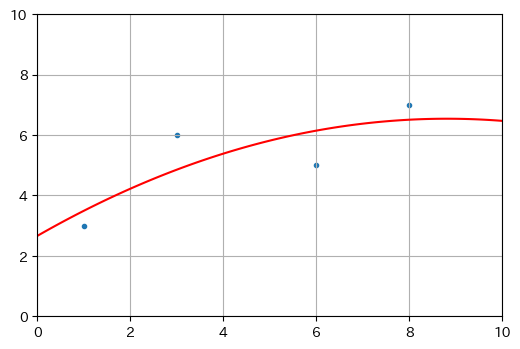

In [14]:
x_plot = np.linspace(0, 10, 100)
y_hat_2ji = omega2[0] + omega2[1]*x_plot + omega2[2]*x_plot**2
plot_graph(x, y, x_plot, y_hat_2ji)

# (4)

In [15]:
y_bar = sum(y)/len(y)

In [16]:
ipusiron_2ji = y - np.dot(X2, omega2)

In [17]:
ipusiron_2ji_bar = sum(ipusiron_2ji)/len(ipusiron_2ji)

In [18]:
var_ipu_2ji = sum((ipusiron_2ji-ipusiron_2ji_bar)**2)/len(ipusiron_2ji)
var_y = sum((y-y_bar)**2)/len(y)

In [28]:
R_2_2ji = 1-(var_ipu_2ji/var_y)
R_2_2ji

array([0.64433498])

# (5)

In [20]:
X3_2_to_4_T = np.array([D[:,0], D[:,0]**2, D[:,0]**3])
X3_2_to_4 = X3_2_to_4_T.T
X3 = np.insert(X3_2_to_4, 0, 1, axis=1)
X3_T = X3.T

In [21]:
X3_T_X3 = np.dot(X3_T, X3)
X3_T_X3_inv = np.linalg.inv(X3_T_X3)

In [22]:
omega3 = X3_T_X3_inv @ X3_T @ y
omega3

array([[-1.22857143],
       [ 5.40952381],
       [-1.27142857],
       [ 0.09047619]])

# (6)

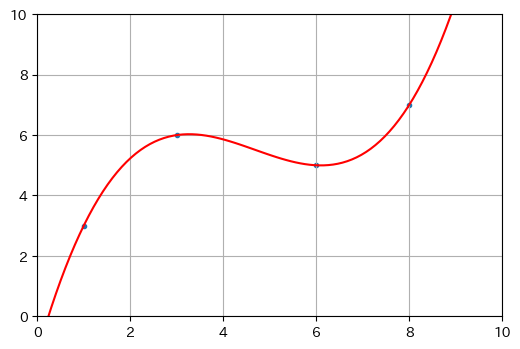

In [23]:
y_hat_3ji = omega3[0] + omega3[1]*x_plot + omega3[2]*x_plot**2 + omega3[3]*x_plot**3
plot_graph(x, y, x_plot, y_hat_3ji)

# (7)

In [24]:
ipusiron_3ji = y - np.dot(X3, omega3)

In [25]:
ipusiron_3ji_bar = sum(ipusiron_3ji)/len(ipusiron_3ji)

In [26]:
var_ipu_3ji = sum((ipusiron_3ji-ipusiron_3ji_bar)**2)/len(ipusiron_3ji)

In [29]:
R_2_3ji = 1-(var_ipu_3ji/var_y)
R_2_3ji

array([1.])